In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
df = pd.read_csv("d:/University/third_course/MTAD/lab4/kmeans.csv")
df

,Track,Danceability_scaled,Loudness_scaled,Cluster
0,Feel Good Inc.,1.198765,0.175395,1
1,Rhinestone Eyes,0.312853,0.388378,1
2,New Gold (feat. Tame Impala and Bootie Brown),0.431390,0.853047,1
3,Clint Eastwood,0.231748,-0.304803,1
4,DARE,0.836913,0.379258,1
...,...,...,...,...
17062,JUST DANCE HARDSTYLE,-0.273596,0.257976,0
17063,SET FIRE TO THE RAIN HARDSTYLE,-0.591776,1.381561,0
17064,OUTSIDE HARDSTYLE SPED UP,-1.140792,0.668412,0
17065,ONLY GIRL HARDSTYLE,-1.303001,0.834805,0


In [42]:
X = df[['Danceability_scaled', 'Loudness_scaled']]
y = df['Cluster']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [44]:
accuracy_list = []
k_values = range(1, 51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)
    accuracy_list.append(accuracy)

In [45]:
optimal_k = k_values[accuracy_list.index(max(accuracy_list))]
print(f"Оптимальне k: {optimal_k}, Точність: {max(accuracy_list):.2f}")

Оптимальне k: 20, Точність: 1.00


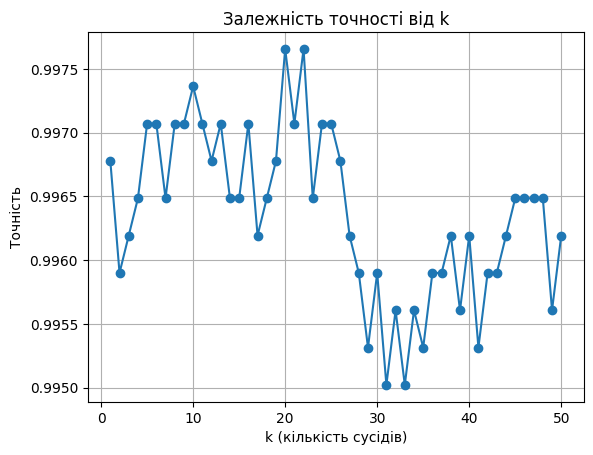

In [ ]:
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel('k (кількість сусідів)')
plt.ylabel('Точність')
plt.title('Залежність точності від k')
plt.grid()
plt.show()

In [49]:
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
y_test_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Точність на тестовій вибірці: {test_accuracy:.2f}")

Точність на тестовій вибірці: 1.00


In [52]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=optimal_k), X, y, cv=3)
print(f"Крос-валідація: середня точність = {cv_scores.mean()}, розкид = {cv_scores.std()}")


Крос-валідація: середня точність = 0.9973047401417942, розкид = 0.0007904574654732644


In [51]:
cv_scores

array([0.99666022, 0.998418  , 0.996836  ])